In [256]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, log_loss
import warnings
warnings.filterwarnings('ignore')

In [255]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3,random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))
X.shape, y.shape

((2, 100), (1, 100))

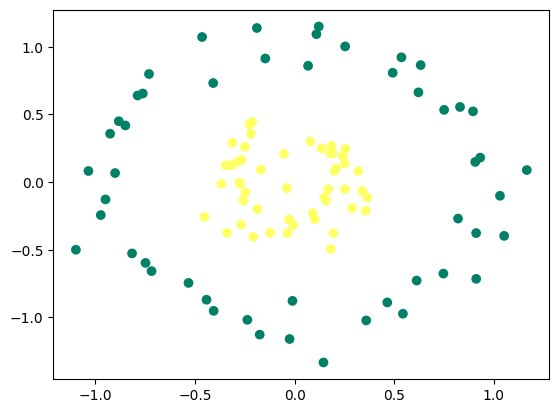

In [250]:
plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')

In [257]:
def initialisation(dimensions):
    parameter = {}
    C = len(dimensions)
    for c in range(1, C):
        parameter[f"W{c}"] = np.random.randn(dimensions[c], dimensions[c-1])
        parameter[f"b{c}"] = np.random.randn(dimensions[c], 1)
    return parameter

In [258]:
def forward_propagation(X, parameters):
    activations = {'A0': X}
    C = len(parameters) // 2
    for c in range(1, C+1):
        Z = parameters[f"W{c}"] @ activations[f"A{c-1}"] + parameters[f"b{c}"]
        activations[f"A{c}"] = 1 / (1+np.exp(-Z))

    return activations

In [259]:
def back_propagation(y, parameters, activations):
    C = len(parameters) // 2
    dZ = activations[f"A{C}"] - y
    gradient = {}
    for c in reversed(range(1, C+1)):
        dW = 1 / y.shape[1] * dZ @ activations[f"A{c-1}"].T
        dB = 1 / y.shape[1] * np.sum(dZ, axis=1, keepdims=True)
        gradient[f"dW{c}"] = dW
        gradient[f"db{c}"] = dB
        if c > 1:
            dZ = parameters[f"W{c}"].T @ dZ * activations[f"A{c-1}"] * (1-activations[f"A{c-1}"])

    return gradient

In [260]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

In [261]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
  return Af >= 0.5

In [271]:
def artifical_neuron(X_train, y_train, hidden_layers, alpha=0.001, nb_iteration=3000):
    dimensions = list(hidden_layers)
    dimensions.insert(0, X_train.shape[0])
    dimensions.append(y_train.shape[0])

    parameters = initialisation(dimensions)
    training_history = np.zeros((nb_iteration, 2))

    C = len(parameters) // 2

    for i in range(nb_iteration):
        activations = forward_propagation(X_train, parameters)
        gradients = back_propagation(y_train, parameters, activations)
        parameters = update(gradients, parameters, alpha)

        Af = activations['A' + str(C)]
        training_history[i, 0] = (log_loss(y.flatten(), Af.flatten()))
        y_pred = predict(X_train, parameters)
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='train acc')
    plt.legend()
    plt.show()
    return training_history

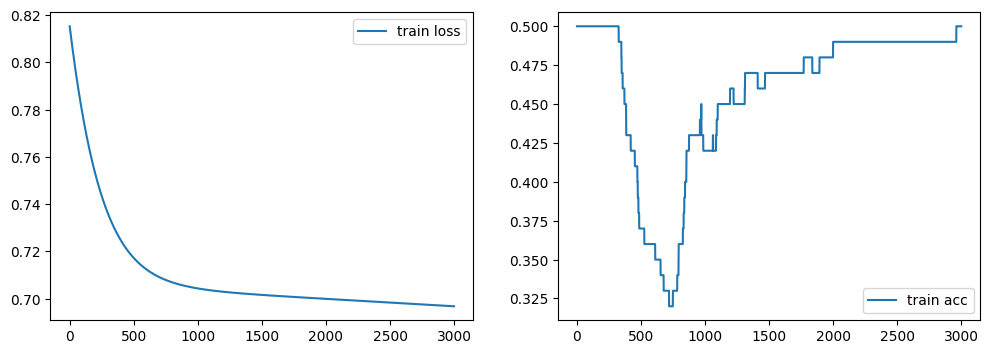

array([[0.81524861, 0.5       ],
       [0.81480505, 0.5       ],
       [0.81436308, 0.5       ],
       ...,
       [0.69681851, 0.5       ],
       [0.69681534, 0.5       ],
       [0.69681217, 0.5       ]])

In [272]:
artifical_neuron(X, y, hidden_layers=(16, 16, 16), nb_iteration=3000, alpha=0.001)

In [273]:
X.shape, y.shape

((2, 100), (1, 100))